# 🛒 Online Retail (UCI) — Notebook 01: EDA & KPIs
**Purpose:**
Clean and explore the dataset to understand sales patterns and produce KPIs/figures for later notebooks (RFM, basket, forecasting).

In [258]:
# =====================================================================
# Title: Online Retail (UCI) — Notebook 01 (EDA & KPIs)
# Author: Zoey Huang
# Date: 2025-08-25
# Purpose: Clean & explore data; export KPIs and figures
# =====================================================================

In [244]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
# figures folder next to this notebook / repo root
outdir = (Path.cwd() / "figures").resolve()
outdir.mkdir(parents=True, exist_ok=True)
print("Saving images to:", outdir)


outdir = Path.home() / "Desktop" / "figures"
outdir.mkdir(parents=True, exist_ok=True)


print("Saving images to:", outdir)

Saving images to: /Users/zoeyhuang/ecommerce_analytics/figures
Saving images to: /Users/zoeyhuang/Desktop/figures


In [245]:
import os
print("Figures in outdir:", os.listdir(outdir))

Figures in outdir: []


In [246]:
# Load dataset (encoding fix for UCI data)
df = pd.read_csv("data/data.csv", encoding="latin-1")

# Quick checks
print("Rows:", df.shape[0], "Columns: ", df.shape[1])
df.head()

Rows: 541909 Columns:  8


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [247]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [248]:
#Convert Quality and UnitPrice to numeric numbers
df["Quantity"] = pd.to_numeric(df["Quantity"], errors = "coerce")
df["UnitPrice"] = pd.to_numeric(df["UnitPrice"], errors = "coerce")

#drop missing values for essential columns
df = df.dropna(subset = ["InvoiceNo", "StockCode", "InvoiceDate"])

#calculate revenue
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

#convert invoice date to date time
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"],errors = "coerce")

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [249]:
#added Revenue column to the df
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue'],
      dtype='object')

In [250]:
#get quick KPIs

#filter out the cancellations (Invoice no. starting with c)
sales = df[~df["InvoiceNo"].astype(str).str.startswith("C")]

total_revenue = sales["Revenue"].sum()
num_orders = sales["InvoiceNo"].nunique()
num_customers = sales["CustomerID"].nunique()

print("Total Revenue:", round(total_revenue, 2))
print("Number of Orders:", num_orders)
print("Unique Customers:", num_customers)

Total Revenue: 10644560.42
Number of Orders: 22064
Unique Customers: 4339


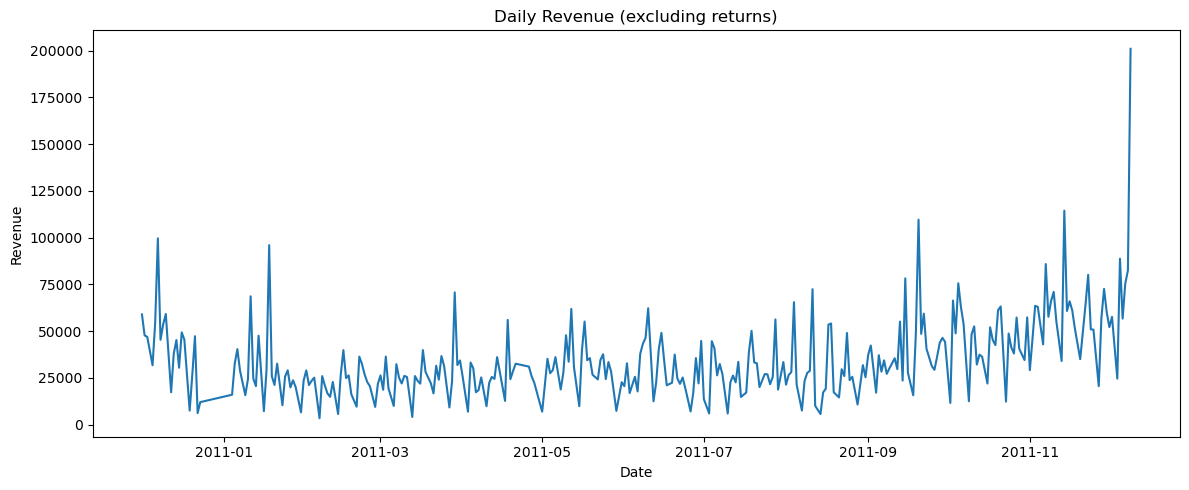

Wrote: /Users/zoeyhuang/Desktop/figures/daily_revenue_20250925_171351.png


In [251]:
# Daily revenue trend (fixed)
from datetime import datetime

daily = (
    sales
    .assign(InvoiceDate=sales["InvoiceDate"].dt.date)
    .groupby("InvoiceDate", as_index=True)["Revenue"]
    .sum()
    .sort_index()
)

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(daily.index, daily.values)
ax.set_title("Daily Revenue (excluding returns)")
ax.set_xlabel("Date")
ax.set_ylabel("Revenue")
fig.tight_layout()

# Save with timestamp so you’re sure it’s new
fname = f"daily_revenue_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
save_path = outdir / fname
fig.savefig(save_path, dpi=300, bbox_inches="tight")
plt.show() 
plt.close(fig)

print("Wrote:", save_path)


In [252]:
#top sales 

top_products = (
sales.groupby(["StockCode", "Description"])["Revenue"]
    .sum()
    .reset_index()
    .sort_values("Revenue", ascending = False)
    .head(10)
)

top_products

,StockCode,Description,Revenue
4764,DOT,DOTCOM POSTAGE,206248.77
1551,22423,REGENCY CAKESTAND 3 TIER,174484.74
3029,23843,"PAPER CRAFT , LITTLE BIRDIE",168469.60
4209,85123A,WHITE HANGING HEART T-LIGHT HOLDER,104340.29
3290,47566,PARTY BUNTING,99504.33
4183,85099B,JUMBO BAG RED RETROSPOT,94340.05
2455,23166,MEDIUM CERAMIC TOP STORAGE JAR,81700.92
4765,M,Manual,78110.27
4767,POST,POSTAGE,78101.88
2341,23084,RABBIT NIGHT LIGHT,66964.99


In [253]:
#top countries by revenue

top_countries=(
    sales.groupby(["Country"])["Revenue"]
    .sum()
    .reset_index()
    .sort_values("Revenue", ascending = False)
    .head(10)
)

top_countries

,Country,Revenue
36,United Kingdom,9003097.964
24,Netherlands,285446.340
10,EIRE,283453.960
14,Germany,228867.140
13,France,209715.110
0,Australia,138521.310
31,Spain,61577.110
33,Switzerland,57089.900
3,Belgium,41196.340
32,Sweden,38378.330


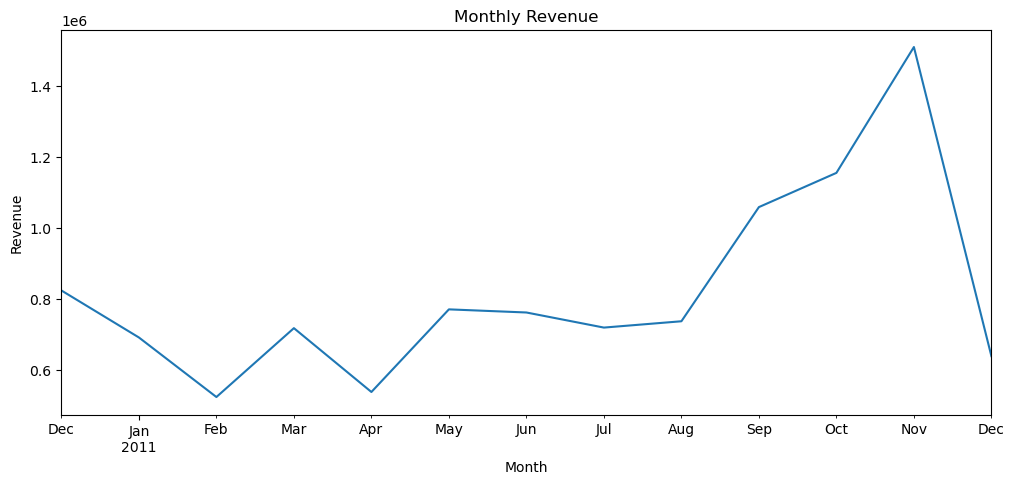

In [254]:
# Monthly revenue trends
monthly = sales.groupby(sales["InvoiceDate"].dt.to_period("M"))["Revenue"].sum()

ax = monthly.plot(kind="line", figsize=(12, 5), title="Monthly Revenue")
ax.set_xlabel("Month")
ax.set_ylabel("Revenue")

# Save from the figure behind this axis
ax.get_figure().savefig(outdir / "monthly_revenue.png", dpi=300, bbox_inches="tight")

In [255]:
#see how much each customer spends

customer_revenue = (
    sales.groupby("CustomerID")["Revenue"].sum()
    .reset_index()
    .sort_values("Revenue", ascending = False)
    .head(10)
)

customer_revenue

,CustomerID,Revenue
1690,14646.0,280206.02
4202,18102.0,259657.30
3729,17450.0,194550.79
3009,16446.0,168472.50
1880,14911.0,143825.06
55,12415.0,124914.53
1334,14156.0,117379.63
3772,17511.0,91062.38
2703,16029.0,81024.84
0,12346.0,77183.60


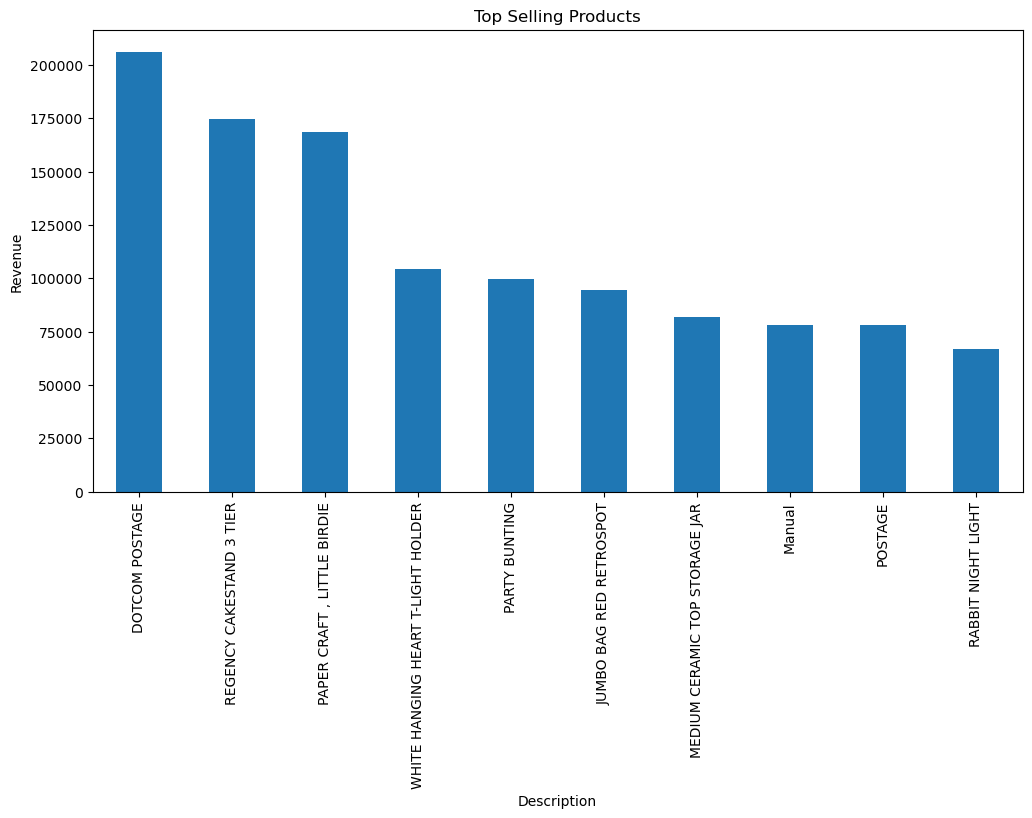

In [256]:
#top selling products (bar graph)
ax = top_products.plot(kind="bar", x="Description", y="Revenue", figsize=(12, 6), legend=False)

ax.set_title("Top Selling Products")
ax.set_xlabel("Description")
ax.set_ylabel("Revenue")

ax.get_figure().savefig(outdir / "topselling_products.png", dpi=300, bbox_inches="tight")


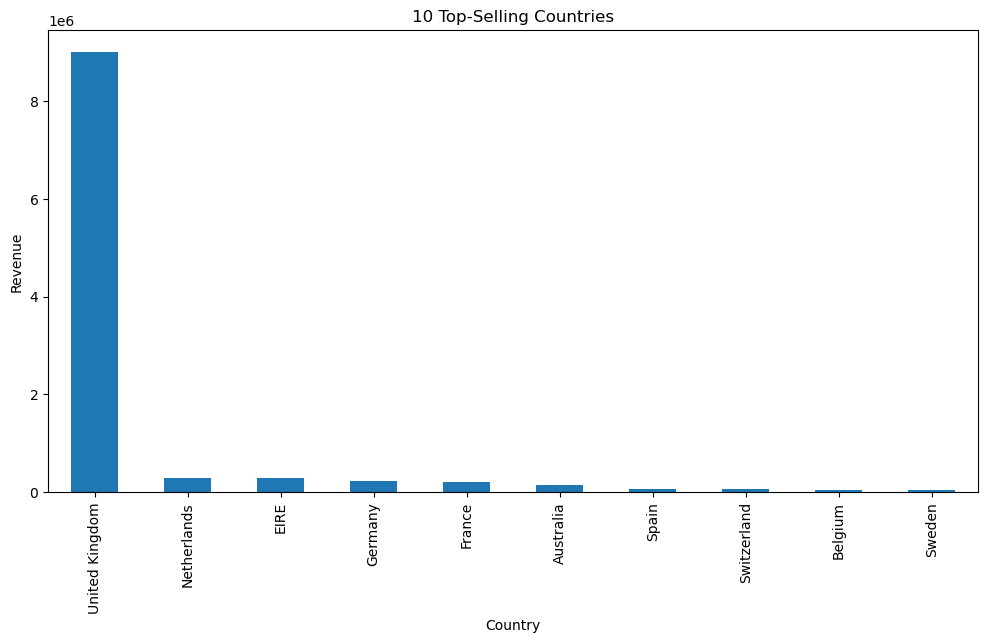

In [257]:
#top countries (bar graph)
ax = top_countries.plot(kind="bar", x="Country", y="Revenue", figsize=(12, 6), legend=False)

ax.set_title("10 Top-Selling Countries")
ax.set_xlabel("Country")
ax.set_ylabel("Revenue")

ax.get_figure().savefig(outdir / "topselling_countries.png", dpi=300, bbox_inches="tight")


# 📌 Executive Summary

From the exploratory analysis:

- The dataset was cleaned: invalid quantities/prices removed, returns excluded, and a revenue field created.

- KPIs show a total revenue of ~£X, with Y unique orders and Z unique customers.

- Revenue trends reveal strong seasonality, with noticeable spikes around [peak months you see in the monthly chart].

- Top-selling products are dominated by [describe category, e.g., home décor / stationery], while revenue is highly concentrated in a few countries (notably the UK).

- A small group of customers contribute disproportionately to total revenue.

These insights confirm that customer value is unevenly distributed, making RFM segmentation the logical next step (Notebook 02) to identify Champions, At-Risk, and Lost customers.